In [1]:
import torch
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
def boost_fault(x: torch.Tensor, group_size: int):
    max = x.abs()
    max = max.view(group_size, -1).amax(dim=(1,))
    q1, q3 = torch.quantile(max, torch.tensor([0.25, 0.75]).to(x.device))
    return max.max() > q3 + 1_000 * (q3 - q1)

calculated for step = 50
calculated for step = 100
calculated for step = 125
calculated for step = 200
calculated for step = 250
calculated for step = 500
calculated for step = 625
calculated for step = 1000
calculated for step = 1250
calculated for step = 2500


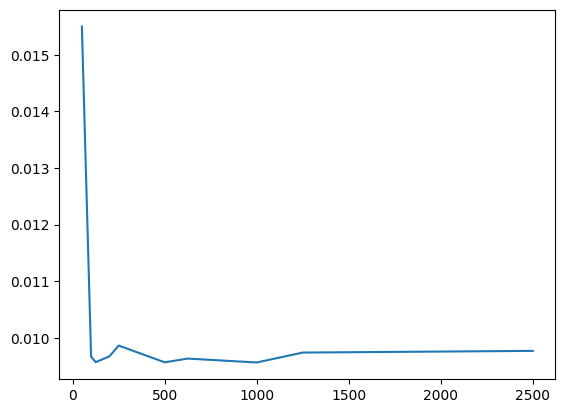

In [3]:
# 16384 8192 4096
x = torch.normal(mean=0, std=1e-9, size=(30000, 10000)).cuda()
duration= 100
max = 5000
steps = [i for i in range(50, max) if max % i ==0]
result = []
for step in steps:
    temp = []
    for _ in range(duration):
        start = time.time()
        boost_fault(x, step)
        temp.append(time.time() - start)
    result.append(np.mean(temp))
    print('calculated for step = {}'.format(step))
plt.plot(steps, result)
plt.show()